In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 학습 데이터
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65]
#n_samples = len(train_X)

# X와 Y의 입력값
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 모델의 wright와 bias의 값을 0으로 초기화
W = tf.Variable(0., name="weight")
b = tf.Variable(0., name="bias")

In [3]:
# linear 모델을 생성
# y = ax + b
# prediction_Y = (Weight * X) + bias
# => 최적의 weight와 bias값을 찾는다
# pred = tf.add(tf.multiply(X, W), b)
pred = W*X + b

# Cost Function 설계 (with Mean squared error)
# => 각 직선에 대해 비용(데이터와 직선과의 거리)을 계산함
# (예측값 - 실제값) 제곱(pow) : 음수 제거, 거리 제곱으로 차이 극대화
# 미분에서 계산의 편의성을 위해 1/2의 곱을 더하는 경우가 있음
#cost = tf.reduce_sum(tf.pow(pred-Y, 2))/n_samples
cost = tf.reduce_mean(tf.square(pred-Y))

# Gradient descent Optimizer(학습)
# 미분을 통해서 해당 점의 기울기가 가장 작은 곳이 최적화의 포인트(learning_rate만큼의 단위로 실행)
# 지속적으로 기울기(미분)를 측정하여 W와 b를 수정
# W' = W - (cost함수의 미분값 * learning_rate:0.01)
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

0 0.3486088 [0.3166581, 0.047172308]
1 0.26719937 [0.3540564, 0.05449022]
2 0.26567203 [0.35825858, 0.057066273]
3 0.26527536 [0.35851526, 0.05907444]
4 0.26489657 [0.35830352, 0.0610109]
5 0.26451984 [0.35803667, 0.06293465]
6 0.26414493 [0.3577639, 0.06485272]
7 0.26377195 [0.357491, 0.06676595]
8 0.26340073 [0.35721865, 0.068674445]
9 0.26303136 [0.356947, 0.07057823]
10 0.2626638 [0.35667598, 0.072477326]
11 0.2622981 [0.35640568, 0.07437174]
12 0.26193416 [0.356136, 0.07626148]
13 0.26157194 [0.355867, 0.07814657]
14 0.2612117 [0.3555987, 0.08002701]
15 0.26085305 [0.355331, 0.0819028]
16 0.26049626 [0.355064, 0.08377398]
17 0.2601412 [0.35479763, 0.08564054]
18 0.25978786 [0.35453194, 0.08750251]
19 0.2594363 [0.3542669, 0.08935988]
20 0.25908646 [0.3540025, 0.09121267]
21 0.25873834 [0.35373878, 0.09306089]
22 0.25839192 [0.3534757, 0.09490456]
23 0.25804722 [0.35321325, 0.09674368]
24 0.25770423 [0.35295147, 0.09857827]
25 0.25736293 [0.35269034, 0.10040833]
26 0.25702327 [0.35

272 0.2087709 [0.3044565, 0.43842423]
273 0.20867053 [0.30431494, 0.43941644]
274 0.20857069 [0.3041737, 0.4404062]
275 0.2084714 [0.30403283, 0.44139352]
276 0.20837249 [0.30389228, 0.4423784]
277 0.20827419 [0.3037521, 0.44336087]
278 0.20817629 [0.30361223, 0.44434088]
279 0.20807886 [0.30347273, 0.4453185]
280 0.20798191 [0.30333358, 0.4462937]
281 0.2078855 [0.30319476, 0.44726652]
282 0.20778957 [0.30305627, 0.4482369]
283 0.20769407 [0.30291817, 0.44920492]
284 0.20759901 [0.30278036, 0.45017055]
285 0.2075045 [0.3026429, 0.4511338]
286 0.2074104 [0.3025058, 0.45209464]
287 0.2073168 [0.30236903, 0.45305315]
288 0.2072236 [0.3022326, 0.4540093]
289 0.2071309 [0.3020965, 0.4549631]
290 0.20703866 [0.3019607, 0.45591453]
291 0.20694683 [0.30182528, 0.4568636]
292 0.20685552 [0.3016902, 0.45781034]
293 0.20676461 [0.30155542, 0.45875475]
294 0.20667413 [0.301421, 0.45969683]
295 0.20658419 [0.3012869, 0.4606366]
296 0.2064946 [0.30115312, 0.46157402]
297 0.20640548 [0.30101967, 0.4

513 0.19459769 [0.27870676, 0.6188751]
514 0.19456707 [0.27862868, 0.6194224]
515 0.19453675 [0.27855074, 0.61996835]
516 0.1945065 [0.27847302, 0.62051296]
517 0.19447643 [0.2783955, 0.62105626]
518 0.19444653 [0.27831817, 0.6215982]
519 0.19441675 [0.27824104, 0.6221388]
520 0.19438705 [0.2781641, 0.62267804]
521 0.19435762 [0.27808732, 0.623216]
522 0.19432823 [0.27801076, 0.6237526]
523 0.19429906 [0.27793437, 0.6242879]
524 0.19426996 [0.27785817, 0.6248219]
525 0.19424106 [0.27778217, 0.6253546]
526 0.1942123 [0.27770633, 0.6258859]
527 0.19418369 [0.27763072, 0.62641597]
528 0.19415519 [0.27755526, 0.6269447]
529 0.19412683 [0.27747998, 0.62747216]
530 0.19409864 [0.2774049, 0.6279983]
531 0.19407052 [0.27733, 0.6285231]
532 0.19404261 [0.27725533, 0.6290466]
533 0.19401482 [0.2771808, 0.6295689]
534 0.19398712 [0.27710646, 0.6300898]
535 0.19395964 [0.2770323, 0.6306095]
536 0.19393222 [0.27695832, 0.6311279]
537 0.19390504 [0.27688453, 0.631645]
538 0.19387788 [0.2768109, 0.63

737 0.19045012 [0.26525167, 0.7131666]
738 0.19044 [0.26520672, 0.7134814]
739 0.19042999 [0.2651619, 0.7137955]
740 0.19041997 [0.2651172, 0.71410877]
741 0.19040999 [0.2650726, 0.7144213]
742 0.19040011 [0.26502812, 0.714733]
743 0.19039026 [0.26498374, 0.715044]
744 0.19038042 [0.2649395, 0.71535426]
745 0.19037065 [0.26489532, 0.71566373]
746 0.19036095 [0.26485127, 0.7159724]
747 0.1903513 [0.26480734, 0.71628034]
748 0.19034173 [0.2647635, 0.71658754]
749 0.19033211 [0.26471978, 0.716894]
750 0.19032262 [0.26467615, 0.7171996]
751 0.19031312 [0.26463264, 0.71750456]
752 0.19030367 [0.26458925, 0.7178087]
753 0.1902943 [0.26454595, 0.7181121]
754 0.19028495 [0.26450276, 0.7184148]
755 0.19027568 [0.26445967, 0.7187167]
756 0.19026643 [0.2644167, 0.71901786]
757 0.19025725 [0.26437384, 0.7193183]
758 0.19024809 [0.26433107, 0.71961796]
759 0.19023898 [0.26428843, 0.7199169]
760 0.19022992 [0.26424587, 0.7202151]
761 0.1902209 [0.26420343, 0.72051257]
762 0.1902119 [0.26416108, 0.72

983 0.18900774 [0.25695738, 0.77129185]
984 0.18900472 [0.25693288, 0.7714634]
985 0.18900177 [0.25690848, 0.7716345]
986 0.18899877 [0.2568841, 0.7718052]
987 0.18899581 [0.2568598, 0.7719755]
988 0.1889929 [0.25683558, 0.7721454]
989 0.18898995 [0.2568114, 0.77231485]
990 0.18898703 [0.25678727, 0.7724839]
991 0.18898413 [0.25676322, 0.7726525]
992 0.18898128 [0.2567392, 0.7728207]
993 0.1889784 [0.25671527, 0.7729885]
994 0.18897551 [0.25669137, 0.77315587]
995 0.18897268 [0.25666755, 0.7733228]
996 0.18896985 [0.2566438, 0.77348936]
997 0.18896706 [0.25662008, 0.7736555]
998 0.18896426 [0.25659645, 0.7738212]
999 0.18896148 [0.25657284, 0.77398646]
1000 0.18895872 [0.25654933, 0.7741514]
1001 0.18895593 [0.25652584, 0.7743159]
1002 0.18895318 [0.25650242, 0.77448]
1003 0.18895046 [0.25647908, 0.77464366]
1004 0.18894775 [0.25645578, 0.7748069]
1005 0.18894504 [0.25643253, 0.7749698]
1006 0.18894237 [0.25640935, 0.7751323]
1007 0.18893966 [0.25638622, 0.77529436]
1008 0.18893705 [0.

1224 0.18858406 [0.2525054, 0.8024908]
1225 0.18858315 [0.2524919, 0.8025854]
1226 0.18858224 [0.25247842, 0.80267984]
1227 0.18858132 [0.25246498, 0.802774]
1228 0.18858041 [0.25245157, 0.80286795]
1229 0.18857953 [0.2524382, 0.80296165]
1230 0.1885786 [0.25242487, 0.8030551]
1231 0.18857773 [0.25241154, 0.8031483]
1232 0.18857685 [0.25239828, 0.8032413]
1233 0.188576 [0.25238505, 0.8033341]
1234 0.1885751 [0.25237185, 0.8034267]
1235 0.18857425 [0.25235865, 0.803519]
1236 0.18857336 [0.2523455, 0.8036111]
1237 0.18857259 [0.25233242, 0.80370295]
1238 0.18857166 [0.25231934, 0.80379456]
1239 0.18857081 [0.25230628, 0.803886]
1240 0.18856996 [0.2522933, 0.8039772]
1241 0.18856917 [0.2522803, 0.80406815]
1242 0.18856832 [0.25226736, 0.80415887]
1243 0.18856743 [0.25225443, 0.8042494]
1244 0.18856665 [0.25224155, 0.8043397]
1245 0.18856584 [0.2522287, 0.80442977]
1246 0.188565 [0.25221586, 0.8045196]
1247 0.18856415 [0.25220308, 0.80460924]
1248 0.18856332 [0.25219032, 0.80469865]
1249 0

1445 0.18846098 [0.25020245, 0.8186295]
1446 0.18846066 [0.2501946, 0.81868434]
1447 0.18846038 [0.2501868, 0.81873906]
1448 0.18846005 [0.250179, 0.81879365]
1449 0.18845972 [0.25017124, 0.8188481]
1450 0.18845946 [0.2501635, 0.8189024]
1451 0.18845917 [0.25015578, 0.81895655]
1452 0.18845883 [0.25014806, 0.8190106]
1453 0.18845858 [0.25014037, 0.8190645]
1454 0.18845828 [0.25013268, 0.81911826]
1455 0.18845797 [0.25012505, 0.8191719]
1456 0.18845767 [0.2501174, 0.81922543]
1457 0.18845741 [0.2501098, 0.8192788]
1458 0.18845716 [0.2501022, 0.819332]
1459 0.18845683 [0.25009462, 0.8193851]
1460 0.18845652 [0.25008705, 0.8194381]
1461 0.18845627 [0.2500795, 0.81949097]
1462 0.18845597 [0.25007197, 0.81954366]
1463 0.18845569 [0.2500645, 0.81959623]
1464 0.18845542 [0.250057, 0.8196487]
1465 0.1884551 [0.25004953, 0.819701]
1466 0.18845485 [0.25004208, 0.8197532]
1467 0.18845463 [0.25003466, 0.8198053]
1468 0.18845432 [0.25002724, 0.81985724]
1469 0.18845402 [0.25001985, 0.81990904]
1470

1670 0.18841925 [0.24884972, 0.8281091]
1671 0.18841913 [0.24884525, 0.82814056]
1672 0.18841903 [0.24884076, 0.82817197]
1673 0.18841892 [0.2488363, 0.82820326]
1674 0.18841884 [0.24883184, 0.8282345]
1675 0.18841876 [0.24882738, 0.82826567]
1676 0.18841864 [0.24882294, 0.8282968]
1677 0.18841852 [0.24881852, 0.8283278]
1678 0.18841846 [0.2488141, 0.8283587]
1679 0.18841836 [0.24880971, 0.8283896]
1680 0.18841824 [0.24880531, 0.82842034]
1681 0.18841814 [0.24880093, 0.82845104]
1682 0.18841808 [0.24879657, 0.8284817]
1683 0.18841797 [0.2487922, 0.82851225]
1684 0.18841785 [0.24878785, 0.8285427]
1685 0.18841778 [0.24878351, 0.8285731]
1686 0.18841769 [0.2487792, 0.82860345]
1687 0.18841758 [0.24877487, 0.8286337]
1688 0.1884175 [0.24877055, 0.8286639]
1689 0.1884174 [0.24876626, 0.828694]
1690 0.18841729 [0.24876198, 0.828724]
1691 0.18841718 [0.24875772, 0.828754]
1692 0.18841714 [0.24875344, 0.82878387]
1693 0.18841706 [0.24874918, 0.8288137]
1694 0.1884169 [0.24874493, 0.8288434]
1

1881 0.18840599 [0.24811023, 0.8332913]
1882 0.1884059 [0.24810757, 0.83331]
1883 0.1884059 [0.24810492, 0.83332866]
1884 0.18840586 [0.24810225, 0.83334726]
1885 0.18840586 [0.24809961, 0.8333658]
1886 0.18840581 [0.24809697, 0.83338434]
1887 0.18840577 [0.24809434, 0.8334028]
1888 0.18840575 [0.24809171, 0.83342123]
1889 0.18840568 [0.24808909, 0.8334396]
1890 0.18840568 [0.24808647, 0.8334579]
1891 0.1884056 [0.24808386, 0.8334762]
1892 0.1884056 [0.24808127, 0.8334944]
1893 0.18840554 [0.24807866, 0.8335126]
1894 0.18840551 [0.24807608, 0.8335307]
1895 0.1884055 [0.24807349, 0.83354884]
1896 0.18840544 [0.24807091, 0.8335669]
1897 0.18840544 [0.24806835, 0.8335849]
1898 0.18840538 [0.24806578, 0.83360285]
1899 0.18840535 [0.24806322, 0.8336208]
1900 0.1884053 [0.24806067, 0.83363867]
1901 0.18840529 [0.24805813, 0.8336565]
1902 0.18840525 [0.24805559, 0.8336743]
1903 0.18840525 [0.24805306, 0.8336921]
1904 0.1884052 [0.24805054, 0.8337098]
1905 0.18840514 [0.24804801, 0.8337274]
19

2160 0.18840058 [0.24757166, 0.83706564]
2161 0.18840054 [0.24757032, 0.837075]
2162 0.18840052 [0.24756898, 0.83708435]
2163 0.18840054 [0.24756765, 0.8370937]
2164 0.18840052 [0.24756631, 0.837103]
2165 0.18840054 [0.247565, 0.8371123]
2166 0.18840049 [0.24756368, 0.8371216]
2167 0.18840052 [0.24756236, 0.83713084]
2168 0.18840052 [0.24756104, 0.8371401]
2169 0.18840049 [0.24755973, 0.83714926]
2170 0.18840049 [0.24755841, 0.83715844]
2171 0.18840045 [0.2475571, 0.8371676]
2172 0.18840045 [0.2475558, 0.83717674]
2173 0.18840043 [0.2475545, 0.83718586]
2174 0.18840045 [0.2475532, 0.837195]
2175 0.18840043 [0.2475519, 0.83720404]
2176 0.18840043 [0.24755062, 0.8372131]
2177 0.18840043 [0.24754933, 0.8372221]
2178 0.18840037 [0.24754804, 0.8372311]
2179 0.18840042 [0.24754676, 0.8372401]
2180 0.1884004 [0.24754548, 0.83724904]
2181 0.18840042 [0.24754421, 0.837258]
2182 0.18840036 [0.24754293, 0.8372669]
2183 0.1884004 [0.24754167, 0.8372758]
2184 0.18840036 [0.2475404, 0.8372847]
2185 

2374 0.18839939 [0.24734865, 0.8386284]
2375 0.18839934 [0.24734786, 0.83863395]
2376 0.18839937 [0.24734707, 0.8386395]
2377 0.18839933 [0.24734628, 0.838645]
2378 0.1883994 [0.2473455, 0.83865047]
2379 0.18839934 [0.24734472, 0.83865595]
2380 0.18839937 [0.24734394, 0.83866143]
2381 0.18839931 [0.24734317, 0.8386669]
2382 0.18839934 [0.24734238, 0.83867234]
2383 0.18839934 [0.2473416, 0.83867776]
2384 0.18839933 [0.24734084, 0.8386832]
2385 0.18839933 [0.24734007, 0.8386886]
2386 0.18839934 [0.2473393, 0.838694]
2387 0.18839931 [0.24733853, 0.83869934]
2388 0.18839931 [0.24733776, 0.8387047]
2389 0.1883993 [0.24733701, 0.83871007]
2390 0.18839931 [0.24733624, 0.8387154]
2391 0.18839933 [0.2473355, 0.8387207]
2392 0.18839931 [0.24733473, 0.838726]
2393 0.18839934 [0.24733397, 0.8387313]
2394 0.18839933 [0.24733321, 0.8387366]
2395 0.18839931 [0.24733247, 0.83874184]
2396 0.1883993 [0.24733172, 0.8387471]
2397 0.18839931 [0.24733098, 0.8387523]
2398 0.18839934 [0.24733023, 0.8387576]
2

2650 0.18839891 [0.24719037, 0.83973765]
2651 0.1883989 [0.24718997, 0.83974046]
2652 0.18839887 [0.24718957, 0.83974326]
2653 0.18839887 [0.24718918, 0.83974606]
2654 0.18839891 [0.24718878, 0.83974886]
2655 0.1883989 [0.24718837, 0.83975166]
2656 0.18839891 [0.24718797, 0.8397544]
2657 0.18839887 [0.24718758, 0.83975714]
2658 0.18839887 [0.2471872, 0.8397599]
2659 0.1883989 [0.24718681, 0.8397626]
2660 0.1883989 [0.2471864, 0.83976537]
2661 0.1883989 [0.24718603, 0.8397681]
2662 0.18839887 [0.24718563, 0.83977085]
2663 0.1883989 [0.24718525, 0.8397736]
2664 0.18839887 [0.24718486, 0.8397763]
2665 0.18839891 [0.24718447, 0.83977896]
2666 0.1883989 [0.24718408, 0.83978164]
2667 0.1883989 [0.2471837, 0.8397843]
2668 0.18839885 [0.24718332, 0.839787]
2669 0.1883989 [0.24718295, 0.8397897]
2670 0.1883989 [0.24718256, 0.8397924]
2671 0.18839887 [0.24718218, 0.83979505]
2672 0.18839891 [0.24718179, 0.83979774]
2673 0.18839884 [0.24718142, 0.8398004]
2674 0.18839887 [0.24718104, 0.83980304]


2870 0.18839881 [0.24712242, 0.8402138]
2871 0.18839878 [0.2471222, 0.8402154]
2872 0.18839876 [0.24712196, 0.840217]
2873 0.18839881 [0.24712174, 0.8402186]
2874 0.18839881 [0.24712151, 0.8402202]
2875 0.18839876 [0.24712127, 0.8402218]
2876 0.18839881 [0.24712104, 0.84022343]
2877 0.18839878 [0.24712083, 0.84022504]
2878 0.18839876 [0.24712059, 0.84022665]
2879 0.18839878 [0.24712037, 0.84022826]
2880 0.18839881 [0.24712013, 0.84022987]
2881 0.18839878 [0.2471199, 0.8402315]
2882 0.18839881 [0.24711968, 0.8402331]
2883 0.18839878 [0.24711944, 0.84023464]
2884 0.18839878 [0.24711922, 0.8402362]
2885 0.18839878 [0.24711901, 0.84023774]
2886 0.18839881 [0.24711879, 0.8402393]
2887 0.18839881 [0.24711856, 0.84024084]
2888 0.18839881 [0.24711834, 0.8402424]
2889 0.18839882 [0.24711812, 0.84024394]
2890 0.18839881 [0.2471179, 0.8402455]
2891 0.18839882 [0.24711768, 0.84024704]
2892 0.18839876 [0.24711746, 0.8402486]
2893 0.18839876 [0.24711724, 0.84025013]
2894 0.18839876 [0.24711703, 0.84

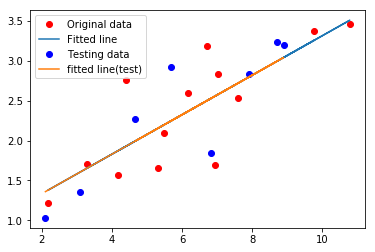

x가 3.3일때 : 1.655813


In [4]:
# 학습 시작
with tf.Session() as sess:
    # 초기화 실행
    sess.run(tf.global_variables_initializer())

    # 학습횟수(epoch:3000)
    for epoch in range(3000):
        sess.run(optimizer, feed_dict={X: train_X, Y:train_Y})

        # 로그
        training_cost = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        training_W = sess.run(W)
        training_b = sess.run(b)
        print(epoch, training_cost, [training_W, training_b])

    print("학습완료! (cost : " + str(training_cost) + ")")
    
    # 새로운 값으로 테스트
    # iteration없고 optimizer없이, 테스트 데이터만 가지고 체크
    # => cost 안에 이미 W와 b가 결정되었기 때문
    test_X = [6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1]
    test_Y = [1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03]

    testing_cost = sess.run(cost, feed_dict={X: test_X, Y: test_Y})
    print("테스트 완료! (cost : " + str(testing_cost) + ")")

    # 학습과 테스트 cost비교(절대값)
    print("테스트와 학습의 cost차이 : ", abs(training_cost - testing_cost))
    
    # 화면표시
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, W.eval() * tf.constant(train_X).eval() + b.eval(), label='Fitted line')

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(test_X, W.eval() * tf.constant(test_X).eval() + b.eval(), label='fitted line(test)')

    plt.legend()
    plt.show()
    
    # 값 예측
    print("x가 3.3일때 : " + str(sess.run(pred, feed_dict={X: 3.3})))